# Load packages

In [220]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Preprocessing

In [221]:
df = pd.read_excel("../regression_analysis_codes/Real estate valuation data set.xlsx")
df = pd.DataFrame(df)
df = df.drop(['No'],axis=1)
df = np.array(df)
splitted_array = np.split(df,[-1],axis=1)
data = pd.DataFrame(splitted_array[0])
label = pd.DataFrame(splitted_array[1])
scaler = preprocessing.MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data)

# Dividing dataset into training set and testing set

In [222]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25, random_state=0)

# MLP

In [223]:
model = Sequential()  
model.add(Dense(units = 8,use_bias = True,activation='relu',input_shape=(X_train.shape[1],) ))
model.add(Dense(units = 16,use_bias = True,activation='relu'))
model.add(Dense(units = 32,use_bias = True,activation='relu'))
model.add(Dense(units = 16,use_bias = True,activation='relu'))
model.add(Dense(units = 8,use_bias = True,activation='relu'))
model.add(Dense(units = 1,activation='linear'))
print(model.summary())
model.compile(loss='mse',optimizer='nadam')
history = model.fit(X_train, y_train,epochs=300,batch_size=68)

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_154 (Dense)            (None, 8)                 56        
_________________________________________________________________
dense_155 (Dense)            (None, 16)                144       
_________________________________________________________________
dense_156 (Dense)            (None, 32)                544       
_________________________________________________________________
dense_157 (Dense)            (None, 16)                528       
_________________________________________________________________
dense_158 (Dense)            (None, 8)                 136       
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 9         
Total params: 1,417
Trainable params: 1,417
Non-trainable params: 0
___________________________________________________

310/310 [==============================] - 0s 25us/step - loss: 73.9865
Epoch 84/100
310/310 [==============================] - 0s 24us/step - loss: 74.5883
Epoch 85/100
310/310 [==============================] - 0s 26us/step - loss: 74.5617
Epoch 86/100
310/310 [==============================] - 0s 23us/step - loss: 73.8315
Epoch 87/100
310/310 [==============================] - 0s 29us/step - loss: 73.5358
Epoch 88/100
310/310 [==============================] - 0s 24us/step - loss: 73.7336
Epoch 89/100
310/310 [==============================] - 0s 24us/step - loss: 73.1749
Epoch 90/100
310/310 [==============================] - 0s 26us/step - loss: 73.1681
Epoch 91/100
310/310 [==============================] - 0s 23us/step - loss: 73.5762
Epoch 92/100
310/310 [==============================] - 0s 24us/step - loss: 72.8717
Epoch 93/100
310/310 [==============================] - 0s 27us/step - loss: 74.3801
Epoch 94/100
310/310 [==============================] - 0s 20us/step - loss: 7

# Graph for convergence loss

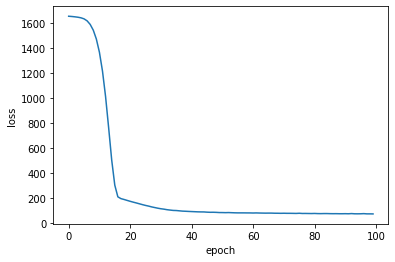

In [224]:
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

# MAE for training set

In [225]:
Y_pre = model.predict(X_train)
mean_absolute_error(y_train, Y_pre)

5.47037000348491

# MAE for testing set

In [226]:
y_pre = model.predict(X_test)
mean_absolute_error(y_test, y_pre)

5.505000712321356

# MSE for training set

In [227]:
mean_squared_error(y_train, Y_pre)

72.32884408450846

# MSE for testing set

In [228]:
mean_squared_error(y_test, y_pre)

62.34567875012977